In [94]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [95]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

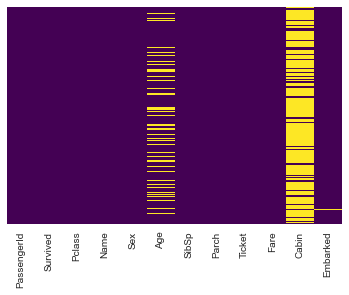

In [97]:
# Detect Missing Value
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [98]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

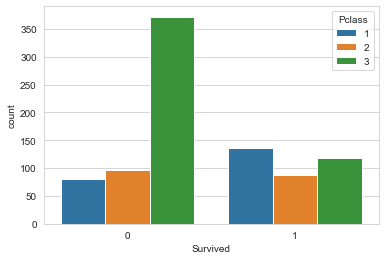

In [99]:
sns.countplot(x='Survived',hue='Pclass',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

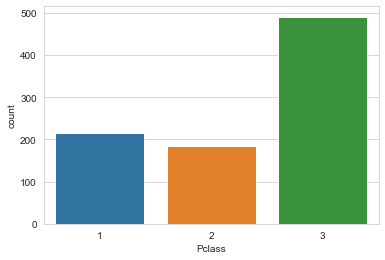

In [100]:
sns.countplot(x='Pclass',data=train)

f:\python\titanic classification\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age'>

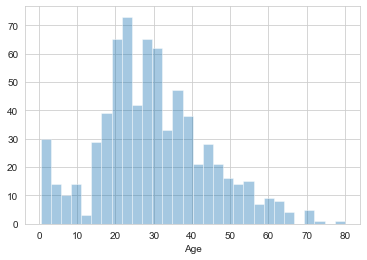

In [101]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:ylabel='Frequency'>

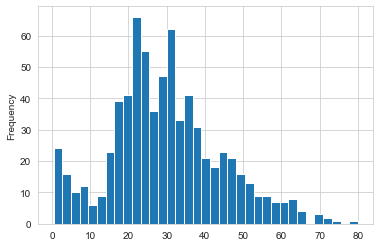

In [102]:
train['Age'].plot.hist(bins=35)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

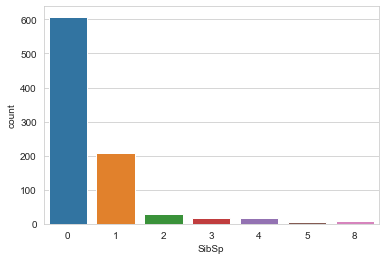

In [103]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

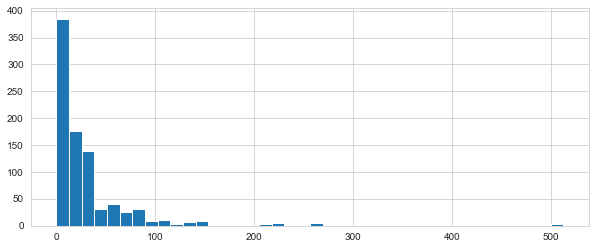

In [104]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [105]:
import cufflinks as cf
cf.go_offline()

In [106]:
train['Fare'].iplot(kind='hist',bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

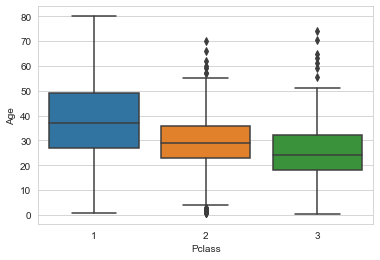

In [107]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [108]:
# Remove Missing Value
def impute_age(cols):
    Age= cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [109]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

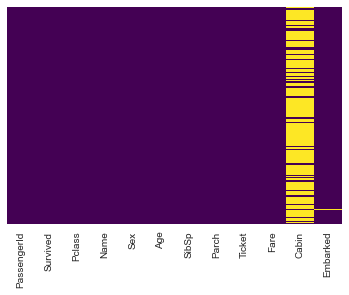

In [110]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [111]:
train.drop('Cabin',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [112]:
train.dropna(inplace=True)

<AxesSubplot:>

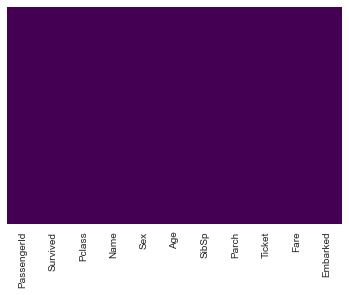

In [113]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [114]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [115]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [116]:
train = pd.concat([train,sex,embark],axis=1)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [117]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [118]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [119]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [120]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [121]:
# Build Model
from sklearn.model_selection import train_test_split
X = train.drop('Survived',axis=1)
y= train['Survived']

In [147]:
X_train,X_test,y_train,y_test =train_test_split(X , y ,test_size=0.3,random_state=101)

In [148]:
# max_iter --> Maximum number of iterations taken for the solvers to converge.
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)

In [149]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [150]:
prediction = logmodel.predict(X_test)

In [146]:
#y_test --> True Value
#Prediction --> Predict Value
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [151]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)



array([[150,  13],
       [ 32,  72]], dtype=int64)